<a href="https://colab.research.google.com/github/ClausGB/Calculo_Aplicado/blob/main/SerieTaylor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-f10a29a098dc>:13: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  divisor   = np.math.factorial(k)


grado :  polinomio
0 : 1
1 : 1
2 : 1 - x**2/2
3 : 1 - x**2/2
4 : x**4/24 - x**2/2 + 1
5 : x**4/24 - x**2/2 + 1
6 : -x**6/720 + x**4/24 - x**2/2 + 1
7 : -x**6/720 + x**4/24 - x**2/2 + 1
8 : x**8/40320 - x**6/720 + x**4/24 - x**2/2 + 1
9 : x**8/40320 - x**6/720 + x**4/24 - x**2/2 + 1
10 : -x**10/3628800 + x**8/40320 - x**6/720 + x**4/24 - x**2/2 + 1
11 : -x**10/3628800 + x**8/40320 - x**6/720 + x**4/24 - x**2/2 + 1
12 : x**12/479001600 - x**10/3628800 + x**8/40320 - x**6/720 + x**4/24 - x**2/2 + 1
13 : x**12/479001600 - x**10/3628800 + x**8/40320 - x**6/720 + x**4/24 - x**2/2 + 1
14 : -x**14/87178291200 + x**12/479001600 - x**10/3628800 + x**8/40320 - x**6/720 + x**4/24 - x**2/2 + 1


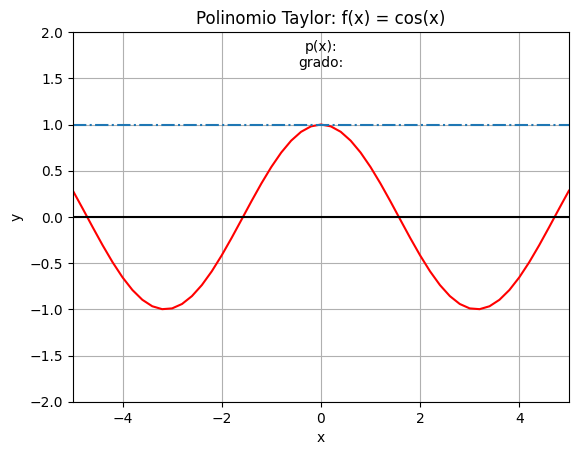

In [1]:
# Aproximación Polinomio de Taylor alrededor de x0
# f(x) en forma simbólica con sympy

import numpy as np
import sympy as sym

def politaylor(fx,x0,n):
    k = 0
    polinomio = 0
    while (k <= n):
        derivada   = fx.diff(x,k)
        derivadax0 = derivada.subs(x,x0)
        divisor   = np.math.factorial(k)
        terminok  = (derivadax0/divisor)*(x-x0)**k
        polinomio = polinomio + terminok
        k = k + 1
    return(polinomio)

# PROGRAMA  -------------
# Capitulo 1 Ejemplo 2, Burden p11, pdf 21

# INGRESO
x = sym.Symbol('x')
fx = sym.cos(x)

x0 = 0
n  = 15  # Grado polinomio Taylor
a  = -5   # intervalo [a,b]
b  = 5
muestras = 51

# PROCEDIMIENTO
# tabla polinomios
px_tabla = []
for grado in range(0,n,1):
    polinomio = politaylor(fx,x0,grado)
    px_tabla.append(polinomio)

# SALIDA
print('grado :  polinomio')
for grado in range(0,n,1):
    px = px_tabla[grado]
    print(str(grado)+ ' : '+str(px))

    # print('polinomio: ')
    # sym.pprint(px)
    # print()

# GRAFICA - TABLA polinomios ------
xi = np.linspace(a,b,muestras)

# Forma lambda, simplifica evaluación
fxn = sym.utilities.lambdify(x,fx,'numpy')
fi  = fxn(xi)

# lineas de cada grado de polinomio
px_lineas = np.zeros(shape=(n,muestras), dtype =float)
for grado in range(0,n,1):
    polinomio = px_tabla[grado]
    px = sym.utilities.lambdify(x,polinomio,'numpy')
    px_lineas[grado] = px(xi)

# SALIDA
# GRAFICA CON ANIMACION ------------
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation, PillowWriter

# Parametros de trama/foto
narchivo = 'Taylor01' # nombre archivo
retardo = 700   # milisegundos entre tramas
tramas = len(px_lineas)
ymax = 2*np.max(np.abs(fi))

# GRAFICA figura
figura, ejes = plt.subplots()

# Función Base
fx_linea, = ejes.plot(xi,fi,'r')

# Polinomios de tablapoli grado = 0
px_unalinea, = ejes.plot(xi, px_lineas[0],
                         '-.', label='grado: 0')

# Configura gráfica
plt.xlim([a,b])
plt.ylim([-ymax,ymax])
plt.axhline(0, color='k')  # horizontal en cero
plt.title('Polinomio Taylor: '+'f(x) = ' + str(fx))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

# cuadros de texto en gráfico
txt_x = (b+a)/2
txt_y = ymax*(1-0.1)
texto_poli = ejes.text(txt_x, txt_y*(1),
                      'p(x):',
                      horizontalalignment='center')
texto_grado = ejes.text(txt_x, txt_y*(1-0.1),
                        'grado:',
                        horizontalalignment='center')

# Nueva Trama
def unatrama(i,xi,pxi):

    # actualiza cada linea
    px_unalinea.set_xdata(xi)
    px_unalinea.set_ydata(pxi[i])
    etiquetap = 'p'+str(i)+'(x) = '+str(px_tabla[i])
    px_unalinea.set_label(etiquetap)

    # actualiza texto
    texto_poli.set_text(etiquetap)
    texto_grado.set_text('Grado: '+str(i))

    # color de la línea
    if (i<=9):
        lineacolor = 'C'+str(i)
    else:
        numerocolor = i%10
        lineacolor = 'C'+str(numerocolor)
    px_unalinea.set_color(lineacolor)

    return (px_unalinea, texto_poli, texto_grado)

# Limpia Trama anterior
def limpiatrama():

    px_unalinea.set_ydata(np.ma.array(xi, mask=True))
    px_unalinea.set_label('')

    texto_poli.set_text('')
    texto_grado.set_text('')

    return (px_unalinea,texto_poli, texto_grado)



In [2]:
# Trama contador
i  = np.arange(0,tramas,1)
ani = animation.FuncAnimation(figura,
                              unatrama,
                              i ,
                              fargs = (xi,px_lineas),
                              init_func = limpiatrama,
                              interval = retardo,
                              blit=True)

# Graba Archivo GIFAnimado y video
ani.save(narchivo+'_GIFanimado.gif',writer='imagemagick')

# ani.save(narchivo+'_video.mp4')
plt.draw()
plt.show()

<Figure size 640x480 with 0 Axes>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful